In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)
import gc
import os
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 
matplotlib.rcParams['figure.figsize'] = (8,6) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
root = '/content/'

In [ ]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
products = pd.read_csv(root + 'products.csv')

In [ ]:
order_products = order_products_prior.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')

In [ ]:
order_products.shape

(24580975, 15)

In [ ]:
order_products['aisle'].value_counts()[0:10]

fresh fruits                     2761265
fresh vegetables                 2589316
packaged vegetables fruits       1338111
yogurt                           1100054
packaged cheese                   743405
milk                              675583
water seltzer sparkling water     637899
chips pretzels                    547888
soy lactosefree                   483798
bread                             443401
Name: aisle, dtype: int64

In [ ]:
cross_df = pd.crosstab(order_products.user_id, order_products.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,6,0,0,0,0,0,2,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,4,0,10,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,8,25,0,0,0,0,1,0,0,0,12,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0,0,0,0,0,0,1,0,1,0,0,5,0,1,0,0,3,0,0,1,0,7,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,33
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,3,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.shape

(205773, 134)

In [ ]:
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.020408,0.0,0.000000,0.0,0.0,0.0,0.061224,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.102041,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.000000,0.122449,0.0,0.000000,0.0,0.0,0.000000,0.040816,0.0,0.000000,0.000000,0.204082,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.204082,0.000000,0.040816,0.0,0.000000,0.0,0.0,0.020408,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.020408
2,0.0,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013072,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.052288,0.0,0.0,0.0,0.0,0.026144,0.0,0.065359,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.039216,0.0,0.0,0.0,0.0,0.0,0.0,0.052288,0.163399,0.0,0.000000,0.000000,0.0,0.006536,0.000000,0.0,0.0,0.078431,0.0,0.0,0.0,0.026144,0.0,0.0,0.006536,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.006536,0.0,0.0,0.0,0.0,0.045752,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.006536,0.000000,0.006536,0.0,0.000000,0.032680,0.0,0.006536,0.0,0.0,0.019608,0.000000,0.0,0.006536,0.000000,0.045752,0.0,0.0,0.006536,0.0,0.0,0.000000,0.026144,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006536,0.0,0.000000,0.0,0.0,0.006536,0.000000,0.006536,0.000000,0.0,0.0,0.0,0.006536,0.0,0.215686
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000

Text(0, 0.5, 'Cumulative Explained Variance')

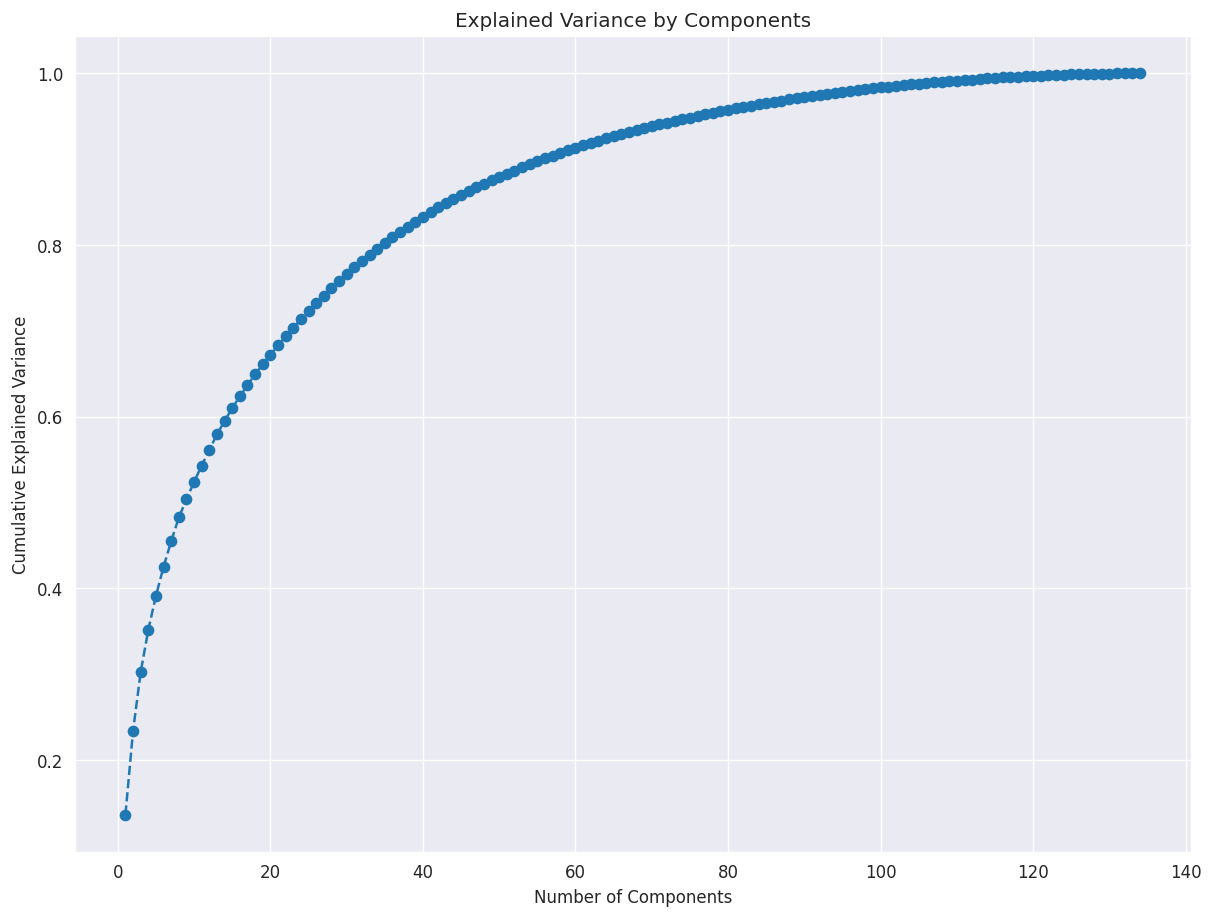

In [ ]:

pca = PCA()
df_pca = pca.fit_transform(df)
pca.explained_variance_ratio_
plt.figure(figsize = (12,9))
plt.plot(range(1,135),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components=30)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.shape


(205773, 30)

In [ ]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.099200,0.054816,-0.043117,0.014598,-0.088134,-0.086263,0.125628,0.056123,-0.059921,-0.027635,-0.034533,0.017760,-0.052501,0.040737,0.047213,-0.005080,-0.026335,0.055311,0.003952,0.036569,-0.043818,-0.005326,0.029490,0.075599,0.022231,0.108995,0.038853,-0.012452,-0.028310,0.020054
1,-0.037128,0.106806,-0.067783,-0.123201,0.098947,-0.034493,0.046572,-0.059487,-0.020896,-0.009369,0.021151,0.018919,0.069188,0.020951,0.014890,-0.000320,-0.004531,-0.005219,-0.000630,0.016864,-0.003436,0.034943,-0.034959,0.001579,0.002186,-0.005960,-0.001292,-0.001449,0.003587,0.003733
2,0.059501,0.114503,0.013276,-0.009997,-0.042596,0.097665,0.018665,-0.012007,-0.010204,0.017395,-0.019632,-0.079406,-0.055897,0.087746,0.011380,0.014749,-0.061645,0.008564,0.009506,0.047175,-0.016440,0.057410,-0.062466,0.009833,0.001738,0.005335,-0.004904,0.003349,-0.002699,-0.011385
3,-0.059801,0.078698,-0.043355,0.003037,-0.087592,-0.031089,0.037362,-0.036893,0.002487,0.027614,-0.001833,0.028165,0.135070,0.039756,-0.035924,0.009010,0.002412,-0.006533,-0.023008,-0.016838,-0.006569,0.018642,-0.003581,-0.002005,0.038394,-0.008378,-0.006562,0.011881,0.018040,0.024871
4,0.063399,-0.004976,-0.037456,-0.022609,0.051849,0.139293,0.023531,0.088170,0.063388,-0.043433,0.039342,0.020342,-0.004273,0.001075,-0.003043,-0.003502,-0.009729,-0.005985,-0.021628,0.002326,0.000357,-0.007375,0.003815,0.015161,0.006387,-0.014777,0.011016,0.002122,-0.000778,-0.009336


In [ ]:
pca.explained_variance_ratio_

array([0.13616083, 0.09763173, 0.06844945, 0.04940036, 0.03950855,
       0.03386658, 0.02971389, 0.02773519, 0.02102744, 0.02040226,
       0.01898884, 0.01844776, 0.0178997 , 0.01571228, 0.01489532,
       0.01389193, 0.0129326 , 0.01261596, 0.01165416, 0.01106994,
       0.01089786, 0.01034692, 0.01009568, 0.0096361 , 0.00955575,
       0.0091392 , 0.00886547, 0.00871417, 0.00820042, 0.00800018])

Text(0, 0.5, 'variance %')

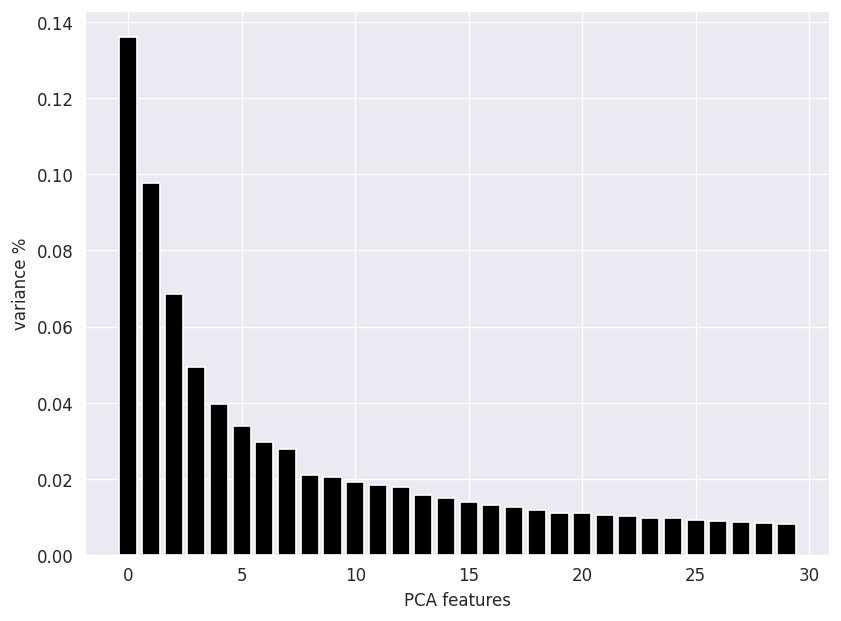

In [ ]:
# Plot the explained variances to verify the variation.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')

In [ ]:
Sum_of_squared_distances = []
K_ss = range(1,10)
for k in K_ss:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

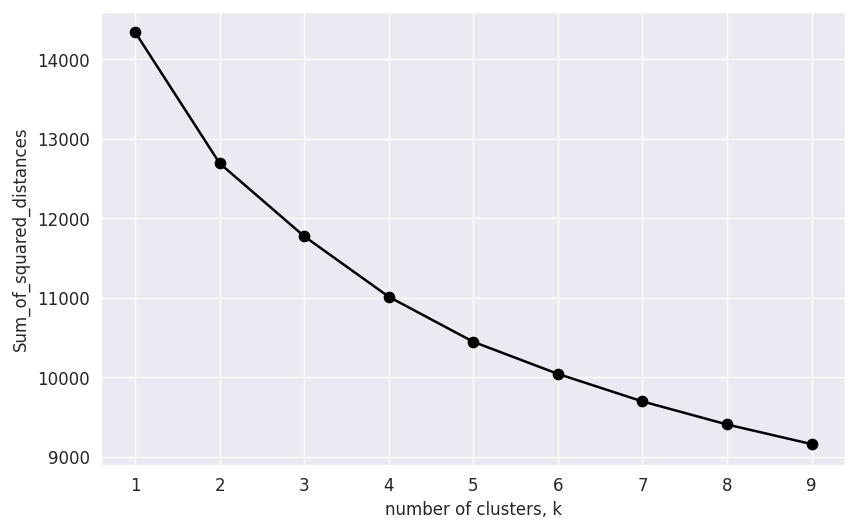

In [ ]:
# plt.subplots(figsize = (8, 5))
# plt.plot(K_ss, Sum_of_squared_distances, '-o')
# plt.xlabel('number of clusters, k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

plt.subplots(figsize = (8, 5))
plt.plot(K_ss, Sum_of_squared_distances, '-o', color='black') 
plt.xlabel('number of clusters, k')
plt.ylabel('Sum_of_squared_distances')
plt.xticks(K_ss)
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

[[ 1.07867479e-01 -7.82522187e-02  1.70779677e-02  2.35928835e-03
   1.12194009e-03 -3.89800683e-03  1.40268305e-03  1.51411610e-03
  -7.18923880e-05  6.13387922e-04  1.16193214e-03 -9.57777450e-04
  -1.54030985e-04  4.62434956e-04  9.54803846e-04 -6.22459940e-04
  -4.39513342e-05  7.66098088e-04 -3.73427362e-04  2.57083641e-04
   1.37764953e-05  3.29261047e-04  4.21652723e-04  2.28514715e-04
  -2.06573730e-05  2.97082455e-04 -3.07360345e-04 -4.87596898e-05
  -2.12808041e-06 -2.94759419e-04]
 [-2.03210478e-01  1.55589176e-02  3.34706691e-01 -2.77292618e-02
   1.83417935e-02  2.25082996e-03 -1.56240831e-03  1.12116218e-02
   1.15118726e-03 -4.26555943e-03 -1.94780610e-03  1.58689816e-03
   1.53564817e-04  3.37087257e-03 -1.85322638e-04  1.06734433e-03
   1.57815879e-03  1.42962351e-03  1.95694880e-03 -7.85788171e-05
  -4.00754453e-04 -3.83014763e-04  8.01014077e-04  7.11528103e-04
  -4.62855713e-04  1.02583978e-03 -9.35656525e-04 -5.68858750e-04
  -1.95519748e-04 -6.66150825e-04]
 [ 7.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


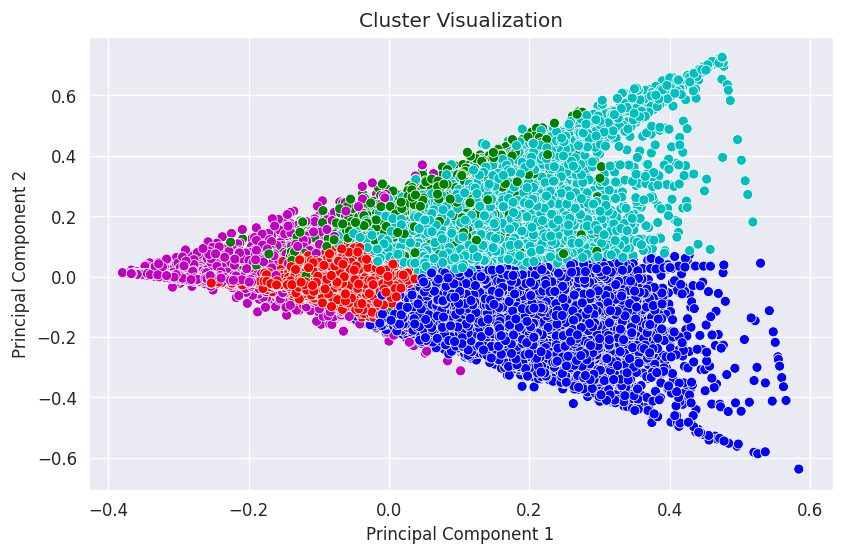

In [ ]:

df_cluster = df_pca.iloc[:,[0, 1]]
df_cluster.columns = ["PCA_1", "PCA_2"]
df_cluster['cluster'] = c_preds
df_cluster.head()


label_color_mapping = {0:'b', 1: 'm', 2: 'c',3:'r' , 4:'g'}
label_color = [label_color_mapping[l] for l in c_preds]

fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = df_cluster, x = "PCA_1", y = "PCA_2", c= label_color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [ ]:
clust_prod = cross_df.copy()
clust_prod['cluster'] = c_preds
clust_prod.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,6,0,0,0,0,0,2,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3
2,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,4,0,10,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,8,25,0,0,0,0,1,0,0,0,12,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0,0,0,0,0,0,1,0,1,0,0,5,0,1,0,0,3,0,0,1,0,7,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,33,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,3,1,0,0,0,0,0,2,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0


In [ ]:
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()

In [ ]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']],
                 [c4['fresh fruits'],c4['fresh vegetables'],c4['packaged vegetables fruits'], c4['yogurt'], c4['packaged cheese'], c4['milk'],c4['water seltzer sparkling water'],c4['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,23.766015,40.486209,13.117776,6.711818,5.457100,4.391670,3.307547,2.761865
1,10.008169,2.830990,3.674280,6.603774,2.620367,3.932953,66.412532,3.916936
2,40.587399,16.242973,13.260757,10.586787,5.505520,6.490945,3.946979,3.378641
3,20.626118,15.689237,12.534093,14.919470,10.070035,8.722170,8.377277,9.061601
4,43.069151,12.729290,16.978433,2.928351,6.332550,6.570474,6.906777,4.484974


In [ ]:
## FOR DEPARTMENT : 

In [ ]:
order_products['department'].value_counts()[0:10]

fresh fruits                     2761265
fresh vegetables                 2589316
packaged vegetables fruits       1338111
yogurt                           1100054
packaged cheese                   743405
milk                              675583
water seltzer sparkling water     637899
chips pretzels                    547888
soy lactosefree                   483798
bread                             443401
Name: aisle, dtype: int64

In [ ]:
cross_df = pd.crosstab(order_products.user_id, order_products.department)
cross_df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,10,3,0,0,10,0,0,0,2,0,0,0,0,1,0,0,5,18
2,0,0,0,6,3,0,0,39,17,0,17,0,3,1,0,0,6,1,0,28,32
3,0,0,0,3,0,0,0,13,0,3,3,1,0,0,0,0,3,0,0,24,8
4,2,0,1,2,0,0,1,0,2,0,2,1,0,0,0,0,0,0,0,2,1
5,0,0,0,0,0,0,1,6,1,1,2,0,1,0,0,0,1,0,0,12,1


In [ ]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.shape

(205773, 21)

In [ ]:
df.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.000000,0.204082,0.061224,0.0,0.000000,0.204082,0.000000,0.000000,0.000000,0.040816,0.000000,0.000000,0.0,0.0,0.020408,0.000000,0.0,0.102041,0.367347
2,0.000000,0.0,0.000000,0.039216,0.019608,0.0,0.000000,0.254902,0.111111,0.000000,0.111111,0.000000,0.019608,0.006536,0.0,0.0,0.039216,0.006536,0.0,0.183007,0.209150
3,0.000000,0.0,0.000000,0.051724,0.000000,0.0,0.000000,0.224138,0.000000,0.051724,0.051724,0.017241,0.000000,0.000000,0.0,0.0,0.051724,0.000000,0.0,0.413793,0.137931
4,0.142857,0.0,0.071429,0.142857,0.000000,0.0,0.071429,0.000000,0.142857,0.000000,0.142857,0.071429,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.142857,0.071429
5,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.038462,0.230769,0.038462,0.038462,0.076923,0.000000,0.038462,0.000000,0.0,0.0,0.038462,0.000000,0.0,0.461538,0.038462


Text(0, 0.5, 'Cumulative Explained Variance')

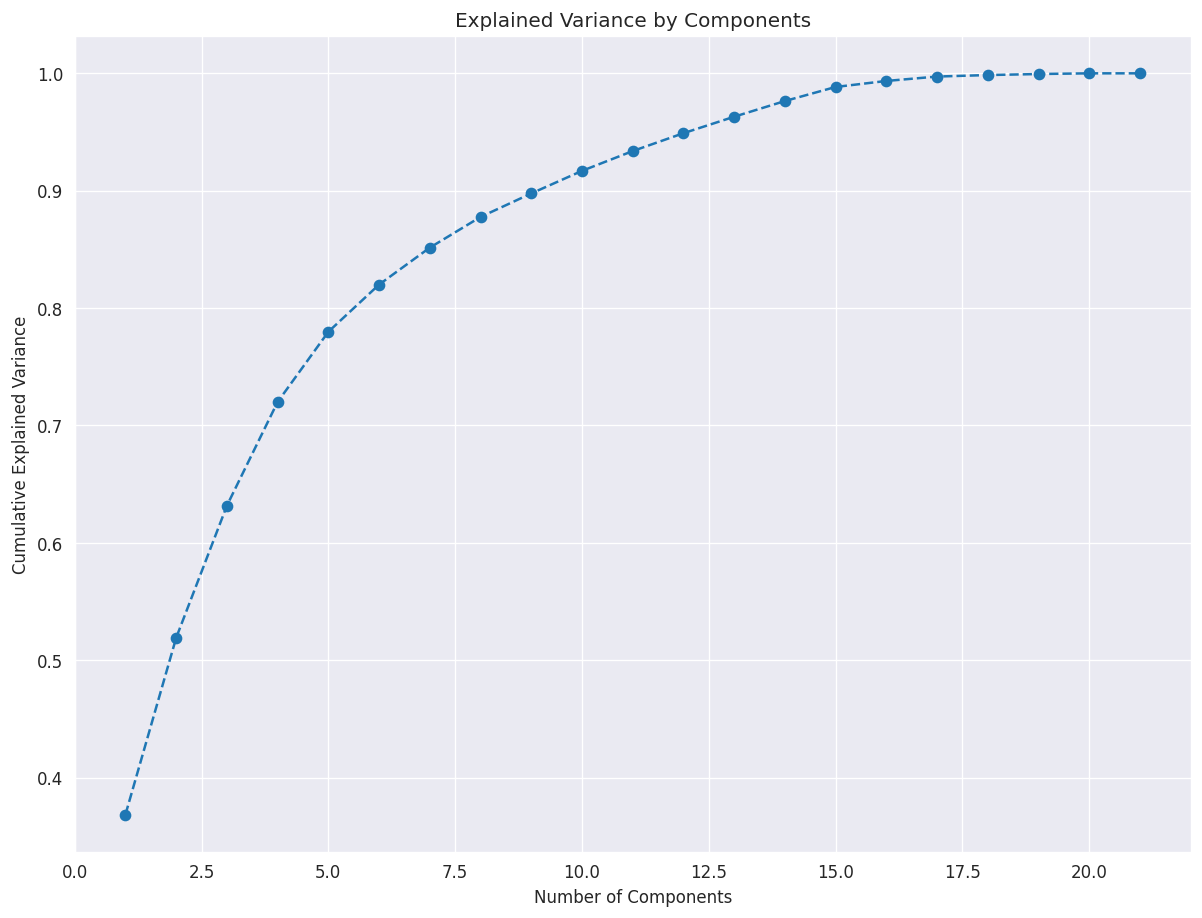

In [ ]:

pca = PCA()
df_pca = pca.fit_transform(df)
pca.explained_variance_ratio_
plt.figure(figsize = (12,9))
plt.plot(range(1,22),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components=9)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.shape


(205773, 9)

In [ ]:
df_pca.head()

,0,1,2,3,4,5,6,7,8
0,-0.243940,0.046353,0.093495,-0.245680,0.024282,-0.027673,-0.030703,0.031698,0.011607
1,-0.097004,-0.116572,0.069512,-0.087458,0.073522,-0.005816,-0.003828,0.005596,-0.023729
2,0.130607,-0.037802,0.007484,-0.089819,0.029598,-0.014251,-0.033859,0.046034,0.003585
3,-0.140215,0.100582,0.067937,0.132909,0.003366,-0.046167,0.153104,-0.004386,-0.030273
4,0.208906,-0.082199,-0.030361,-0.013559,0.036260,-0.011154,-0.005435,0.015884,0.020291


In [ ]:
pca.explained_variance_ratio_

array([0.36851933, 0.15058913, 0.11255401, 0.08839563, 0.05976043,
       0.04021215, 0.03146383, 0.02614659, 0.02002735])

Text(0, 0.5, 'variance %')

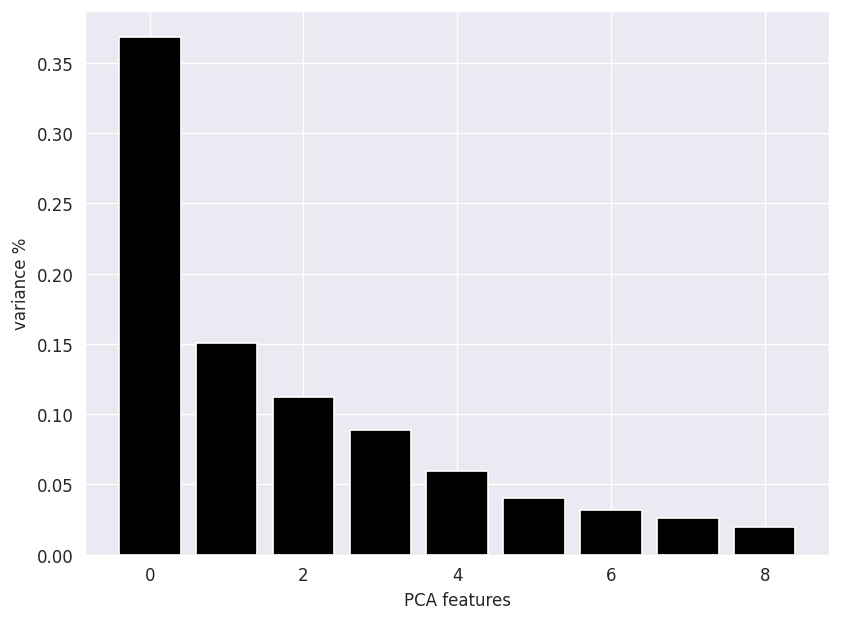

In [ ]:
# Plot the explained variances to verify the variation.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')

In [ ]:
Sum_of_squared_distances = []
K_ss = range(1,10)
for k in K_ss:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

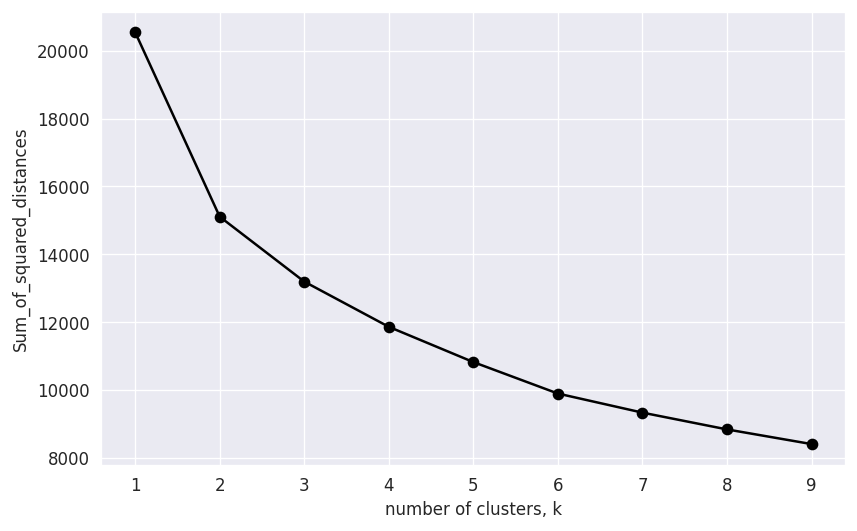

In [ ]:
plt.subplots(figsize = (8, 5))
plt.plot(K_ss, Sum_of_squared_distances, '-o', color='black') 
plt.xlabel('number of clusters, k')
plt.ylabel('Sum_of_squared_distances')
plt.xticks(K_ss)
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=4,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

[[ 2.70821626e-01  5.19062256e-02  4.04446834e-03 -4.42077127e-03
   6.38021325e-04 -5.14949544e-03 -2.66992346e-03  4.97309078e-03
  -7.14224066e-04]
 [-2.95806308e-01  2.90006623e-01 -1.58427390e-01 -4.52691310e-02
   2.41236911e-02  4.78346166e-03 -7.23612774e-03  4.73545613e-03
   1.20860505e-05]
 [ 2.00231656e-02 -5.54492404e-02 -2.43360507e-02 -6.96577116e-03
   7.50703051e-04  7.23151729e-03  1.37323082e-03 -5.47213426e-03
   1.79330171e-03]
 [-1.86005318e-01 -1.76018994e-02  6.29575827e-02  2.24303062e-02
  -6.30550371e-03 -7.31342911e-03  1.54465066e-03  3.04786195e-03
  -2.03062733e-03]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


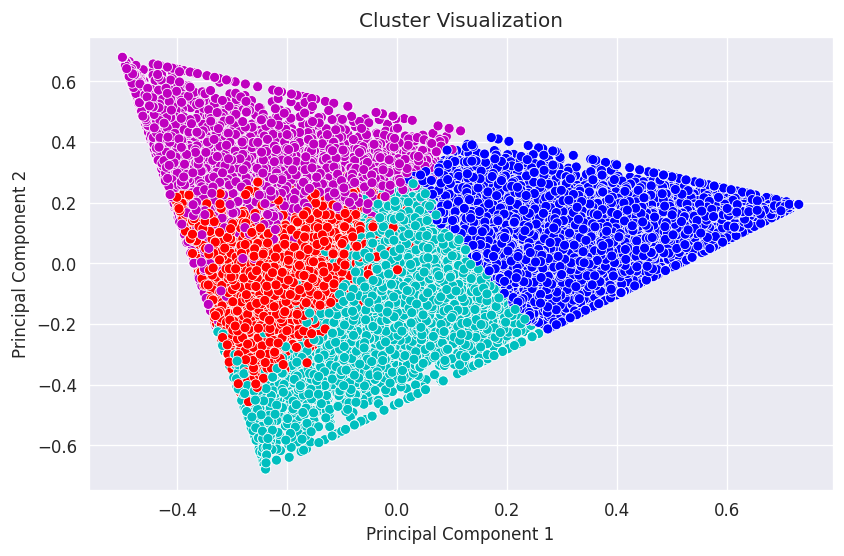

In [ ]:

df_cluster = df_pca.iloc[:,[0, 1]]
df_cluster.columns = ["PCA_1", "PCA_2"]
df_cluster['cluster'] = c_preds
df_cluster.head()


label_color_mapping = {0:'b', 1: 'm', 2: 'c',3:'r' , 4:'g'}
label_color = [label_color_mapping[l] for l in c_preds]

fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = df_cluster, x = "PCA_1", y = "PCA_2", c= label_color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [ ]:
clust_prod = cross_df.copy()
clust_prod['cluster'] = c_preds
clust_prod.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,10,3,0,0,10,0,0,0,2,0,0,0,0,1,0,0,5,18,3
2,0,0,0,6,3,0,0,39,17,0,17,0,3,1,0,0,6,1,0,28,32,3
3,0,0,0,3,0,0,0,13,0,3,3,1,0,0,0,0,3,0,0,24,8,2
4,2,0,1,2,0,0,1,0,2,0,2,1,0,0,0,0,0,0,0,2,1,3
5,0,0,0,0,0,0,1,6,1,1,2,0,1,0,0,0,1,0,0,12,1,0


In [ ]:
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()

print(c0)

print(c1.head())

print(c2.head())

print(c3.head())


department
alcohol             0.064766
babies              0.630259
bakery              2.609106
beverages           5.103028
breakfast           1.344837
bulk                0.177591
canned goods        3.613067
dairy eggs         13.789689
deli                2.936877
dry goods pasta     2.336557
frozen              4.818701
household           1.129343
international       0.859554
meat seafood        2.464931
missing             0.213935
other               0.088448
pantry              5.695763
personal care       0.791880
pets                0.064556
produce            57.191623
snacks              5.697364
dtype: float64
department
alcohol       0.529307
babies        0.136991
bakery        1.154030
beverages    24.405946
breakfast     1.218351
dtype: float64
department
alcohol      0.306609
babies       2.372311
bakery       5.679636
beverages    9.640081
breakfast    3.074952
dtype: float64
department
alcohol       1.343364
babies        1.416718
bakery        4.377540
beverage

In [ ]:
from IPython.display import display, HTML
cluster_means = [[c0['alcohol'],c0['babies'],c0['bakery'], c0['beverages'], c0['breakfast'], c0['bulk'],c0['bulk'],c0['produce']],
                 [c1['alcohol'],c1['babies'],c1['bakery'], c1['beverages'], c1['breakfast'], c1['bulk'],c1['dairy eggs'],c1['produce']],
                 [c2['alcohol'],c2['babies'],c2['bakery'], c2['beverages'], c2['breakfast'], c2['bulk'],c2['dairy eggs'],c2['produce']],
                 [c3['alcohol'],c3['babies'],c3['bakery'], c3['beverages'], c3['breakfast'], c3['bulk'],c3['dairy eggs'],c3['produce']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['alcohol','babies','bakery','beverages','breakfast','bulk','bulk','produce'])
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,alcohol,babies,bakery,beverages,breakfast,bulk,bulk,produce
0,0.096237,0.936509,3.876898,7.582643,1.998308,0.263884,0.263884,84.981637
1,1.331373,0.344576,2.902750,61.388674,3.064537,0.141002,16.613130,14.213958
2,0.331116,2.561925,6.133600,10.410597,3.320728,0.168071,30.823885,46.250077
3,2.783002,2.934967,9.068802,23.300485,6.676247,0.122781,31.111187,24.002530


In [ ]:
## FOR HOUR OF THE DAY

In [ ]:
order_products['order_hour_of_day'].value_counts()[0:10]

10    2098522
11    2072667
14    2039352
15    2020521
13    2017015
12    1985262
16    1924506
9     1866023
17    1582355
8     1302333
Name: order_hour_of_day, dtype: int64

In [ ]:
cross_df = pd.crosstab(order_products.user_id, order_products.order_hour_of_day)
cross_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
user_id,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,11,14,5,0,0,5,0,0,8,6,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,47,55,35,0,0,0,16,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,15,14,0,10,9,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,7,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,17,0,0,0,0,0


In [ ]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.shape

(205773, 24)

In [ ]:
df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
user_id,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22449,0.285714,0.102041,0.000000,0.000000,0.102041,0.000000,0.000000,0.163265,0.122449,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.307190,0.359477,0.228758,0.000000,0.000000,0.000000,0.104575,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172414,0.258621,0.241379,0.0,0.172414,0.155172,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.142857,0.000000,0.357143,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346154,0.0,0.653846,0.000000,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Cumulative Explained Variance')

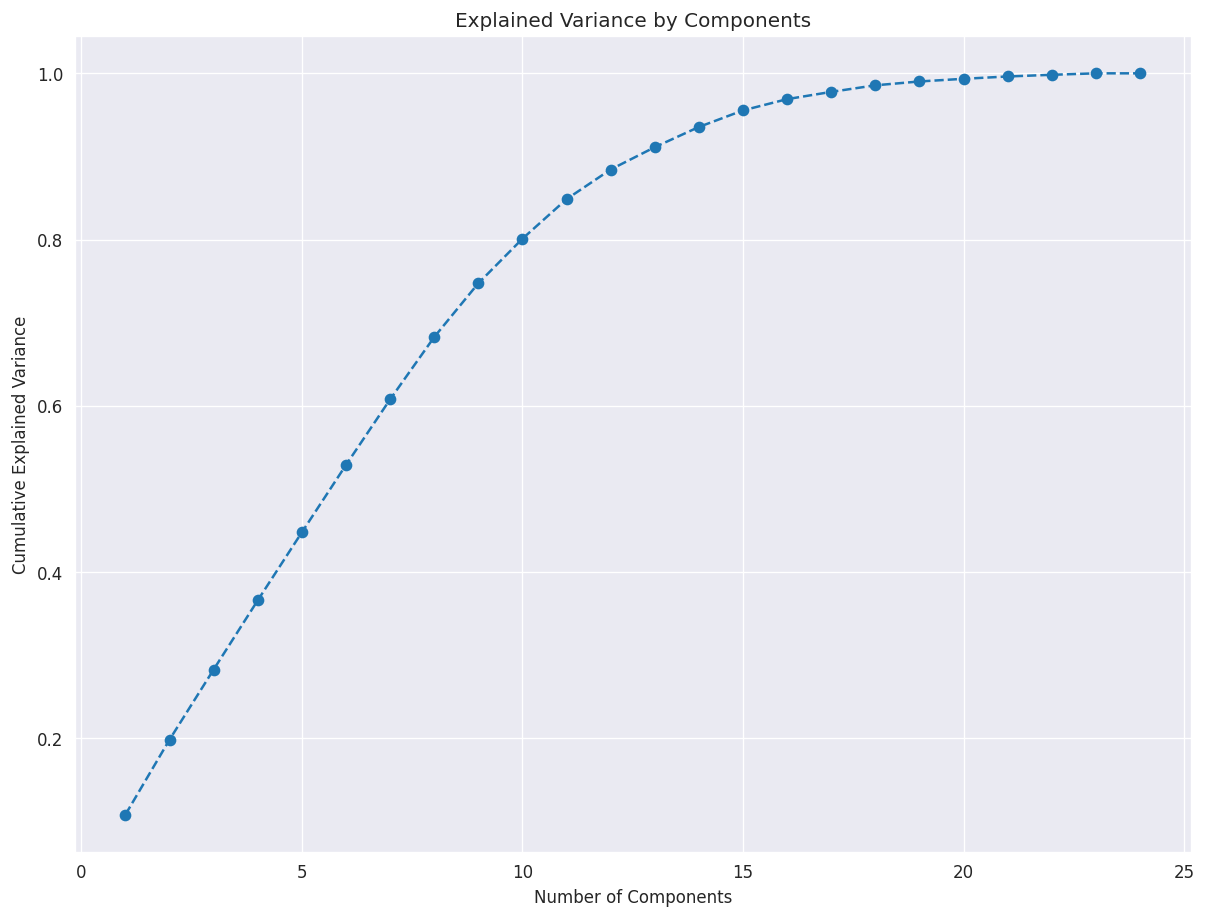

In [ ]:

pca = PCA()
df_pca = pca.fit_transform(df)
pca.explained_variance_ratio_
plt.figure(figsize = (12,9))
plt.plot(range(1,25),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components=12)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.shape


(205773, 12)

In [ ]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.015333,-0.056751,0.042904,0.038013,-0.116316,-0.055848,0.031330,0.168147,0.016993,0.224564,-0.120677,-0.024236
1,0.330676,-0.173781,0.145361,0.105041,-0.000928,0.015497,0.032618,-0.003525,-0.058105,-0.133479,0.026525,-0.018719
2,-0.262920,-0.023743,0.111499,0.074729,0.030386,-0.073519,0.073496,0.029221,0.141802,-0.046002,0.046494,-0.086485
3,-0.108440,0.247523,0.203593,0.288030,-0.167603,0.267349,0.001475,-0.000811,-0.020334,-0.021516,-0.010757,-0.016333
4,-0.283897,-0.233651,-0.156043,-0.071448,0.036405,0.015256,0.066099,0.012190,0.423794,-0.262036,-0.253370,-0.046325


In [ ]:
pca.explained_variance_ratio_

array([0.10794295, 0.0902101 , 0.08439985, 0.08328173, 0.081837  ,
       0.08104159, 0.07889847, 0.07499774, 0.06472857, 0.0536096 ,
       0.04763092, 0.03568118])

Text(0, 0.5, 'variance %')

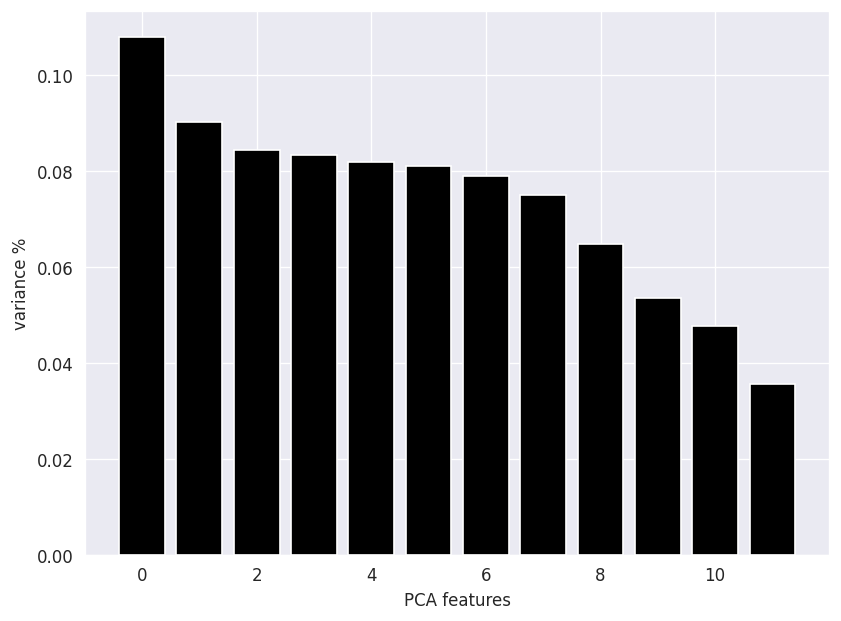

In [ ]:
# Plot the explained variances to verify the variation.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')

In [ ]:
Sum_of_squared_distances = []
K_ss = range(1,10)
for k in K_ss:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

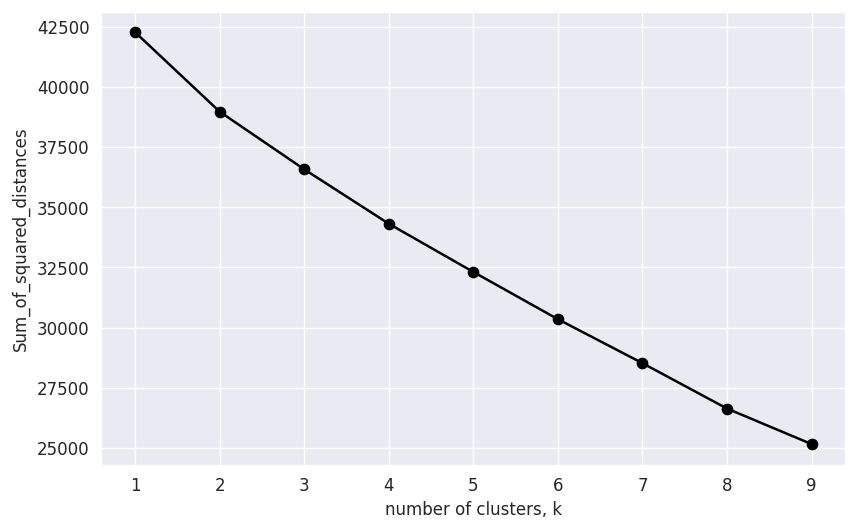

In [ ]:
plt.subplots(figsize = (8, 5))
plt.plot(K_ss, Sum_of_squared_distances, '-o', color='black') 
plt.xlabel('number of clusters, k')
plt.ylabel('Sum_of_squared_distances')
plt.xticks(K_ss)
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=4,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

[[ 0.13888177  0.0293809  -0.11813602  0.20750942  0.13894447  0.03838342
  -0.01012037 -0.0112273  -0.00257504 -0.0109731  -0.00103237 -0.00560867]
 [ 0.14857803 -0.08685329  0.07472312 -0.04585331 -0.03483872 -0.00816609
   0.01395749  0.02448596 -0.01389618  0.01095611 -0.01586698 -0.00797621]
 [-0.13120553 -0.06635425 -0.01557313  0.01333103 -0.01585515  0.00258449
  -0.01510266 -0.0101255   0.0164066  -0.00084185  0.01305153  0.0091071 ]
 [-0.01281567  0.17075349  0.00132562 -0.0655697  -0.00315976 -0.01261442
   0.01305901 -0.00417744 -0.00948548 -0.00472119 -0.00325765 -0.00317543]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


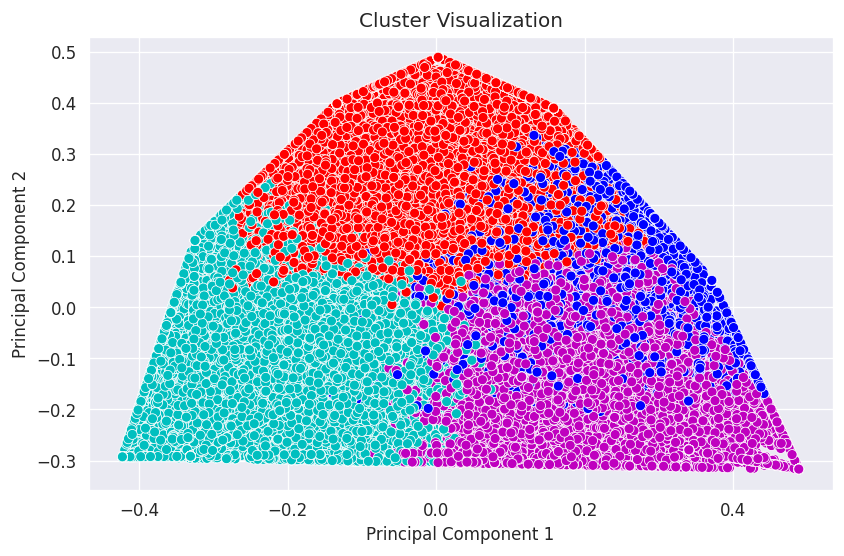

In [ ]:

df_cluster = df_pca.iloc[:,[0, 1]]
df_cluster.columns = ["PCA_1", "PCA_2"]
df_cluster['cluster'] = c_preds
df_cluster.head()


label_color_mapping = {0:'b', 1: 'm', 2: 'c',3:'r' , 4:'g'}
label_color = [label_color_mapping[l] for l in c_preds]

fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = df_cluster, x = "PCA_1", y = "PCA_2", c= label_color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [ ]:
clust_prod = cross_df.copy()
clust_prod['cluster'] = c_preds
clust_prod.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,11,14,5,0,0,5,0,0,8,6,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,47,55,35,0,0,0,16,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,15,14,0,10,9,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,7,0,0,0,0,0,0,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,17,0,0,0,0,0,2


In [ ]:
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean().sort_values(ascending=False)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean().sort_values(ascending=False)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean().sort_values(ascending=False)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean().sort_values(ascending=False)
c4 = clust_prod[clust_prod['cluster']==4].drop('cluster',axis=1).mean().sort_values(ascending=False)



In [ ]:
print(c0.head)
print("*************************************************")
print(c1.head)
print("*************************************************")
print(c2.head)
print("*************************************************")
print(c3.head)
print("*************************************************")

<bound method NDFrame.head of order_hour_of_day
11    25.597290
12     6.966365
10     6.700273
13     5.557032
14     4.884680
15     4.851392
9      4.456820
16     4.119519
17     3.143197
8      2.684473
18     2.258301
19     1.759318
20     1.391368
7      1.379637
21     1.244968
22     1.052422
23     0.656985
6      0.419939
0      0.395524
1      0.205662
5      0.114411
2      0.111034
3      0.089520
4      0.086403
dtype: float64>
*************************************************
<bound method NDFrame.head of order_hour_of_day
10    22.684259
9     21.897204
8     13.769226
11    11.128993
12     9.485867
13     8.239353
14     7.763118
15     7.338414
16     6.098736
7      6.029893
17     4.401513
18     3.410188
20     3.063271
21     3.023535
19     3.021122
22     2.357947
6      1.788855
23     1.364611
0      0.644600
5      0.445251
1      0.306013
4      0.203887
2      0.192991
3      0.150345
dtype: float64>
*************************************************
<bou

In [ ]:
from IPython.display import display, HTML
cluster_means = [[c0[13],c0[14],c0[12], c0[15], c0[11], c0[16],c0[10],c0[9]],
                 [c1[13],c1[14],c1[12], c1[15], c1[11], c1[16],c1[10],c1[9]],
                 [c2[13],c2[14],c2[12], c2[15], c2[11], c2[16],c2[10],c2[9]],
                 [c3[13],c3[14],c3[12], c3[15], c3[11], c3[16],c3[10],c3[9]]]
cluster_means = pd.DataFrame(cluster_means, columns = [13,14,12,15,11,16,10,9])
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,13,14,12,15,11,16,10,9
0,8.802052,7.737081,11.034363,7.684354,40.544786,6.525105,10.612886,7.059373
1,8.706367,8.203139,10.023536,7.754363,11.759795,6.444418,23.970024,23.138359
2,10.408406,11.992230,9.759819,20.026077,9.503182,23.032616,8.172974,7.104696
3,20.142454,19.814921,18.066218,11.458829,9.197259,7.992562,7.589817,5.737940


In [ ]:
## FOR WEEK 

In [ ]:
order_products['order_dow'].value_counts()[0:10]

0    4712694
1    4296919
6    3410300
2    3199696
5    3190355
3    2907969
4    2863042
Name: order_dow, dtype: int64

In [ ]:
cross_df = pd.crosstab(order_products.user_id, order_products.order_dow)
cross_df.head()

order_dow,0,1,2,3,4,5,6
user_id,,,,,,,
1,0,11,5,11,22,0,0
2,0,45,73,29,0,6,0
3,22,16,5,15,0,0,0
4,0,0,0,0,9,5,0
5,9,12,0,5,0,0,0


In [ ]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.shape

(205773, 7)

In [ ]:
df.head()

order_dow,0,1,2,3,4,5,6
user_id,,,,,,,
1,0.000000,0.224490,0.102041,0.224490,0.448980,0.000000,0.0
2,0.000000,0.294118,0.477124,0.189542,0.000000,0.039216,0.0
3,0.379310,0.275862,0.086207,0.258621,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.642857,0.357143,0.0
5,0.346154,0.461538,0.000000,0.192308,0.000000,0.000000,0.0


Text(0, 0.5, 'Cumulative Explained Variance')

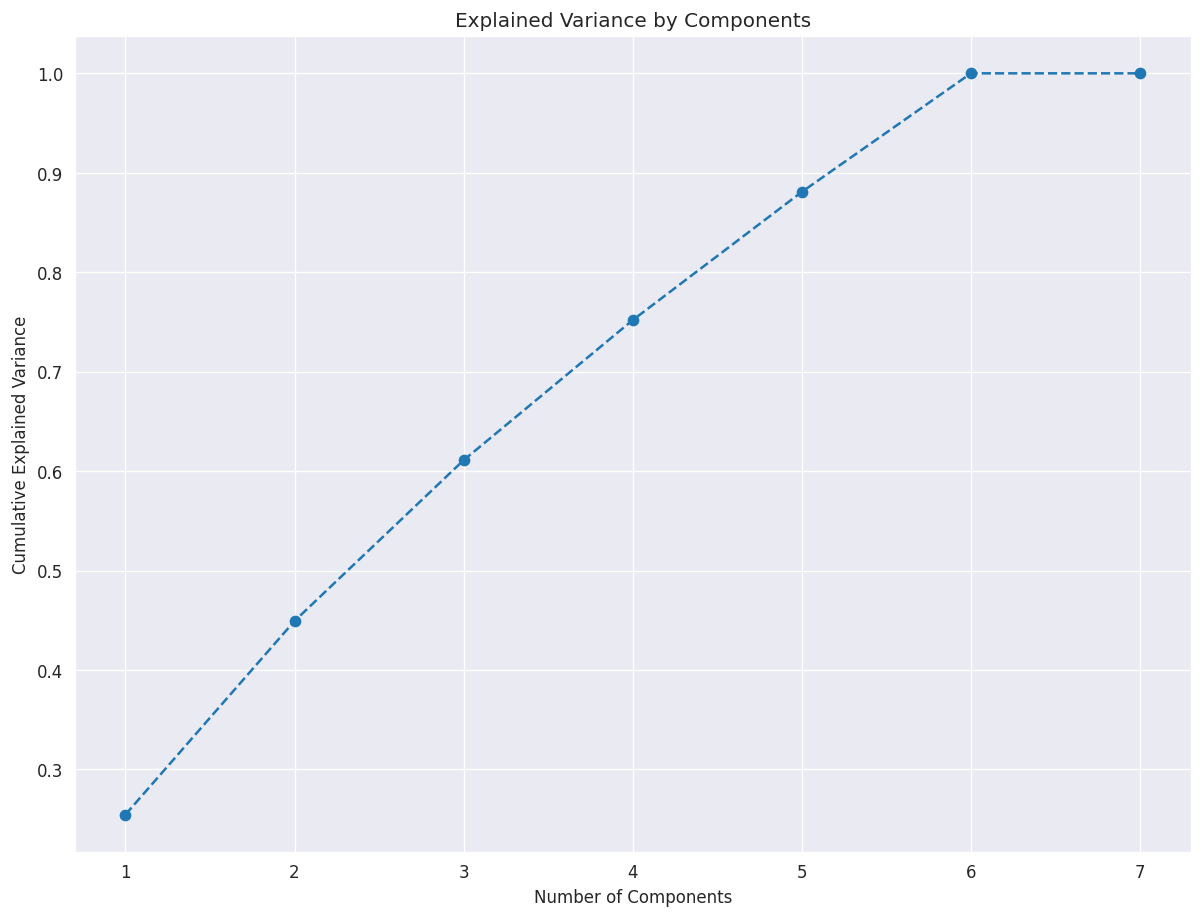

In [ ]:

pca = PCA()
df_pca = pca.fit_transform(df)
pca.explained_variance_ratio_
plt.figure(figsize = (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.shape


(205773, 6)

In [ ]:
df_pca.head()

,0,1,2,3,4,5
0,-0.260434,0.019677,-0.111857,-0.035263,0.249081,0.224376
1,-0.296313,0.135715,-0.087731,-0.236519,-0.175263,-0.113220
2,0.106226,0.255540,-0.073610,-0.030160,0.112631,-0.148900
3,-0.189087,-0.264522,-0.199424,0.303430,0.106502,0.442948
4,0.047233,0.378348,0.069361,0.050669,0.129662,-0.109174


In [ ]:
pca.explained_variance_ratio_

array([0.25457622, 0.19470505, 0.161666  , 0.14088638, 0.12891872,
       0.11924762])

Text(0, 0.5, 'variance %')

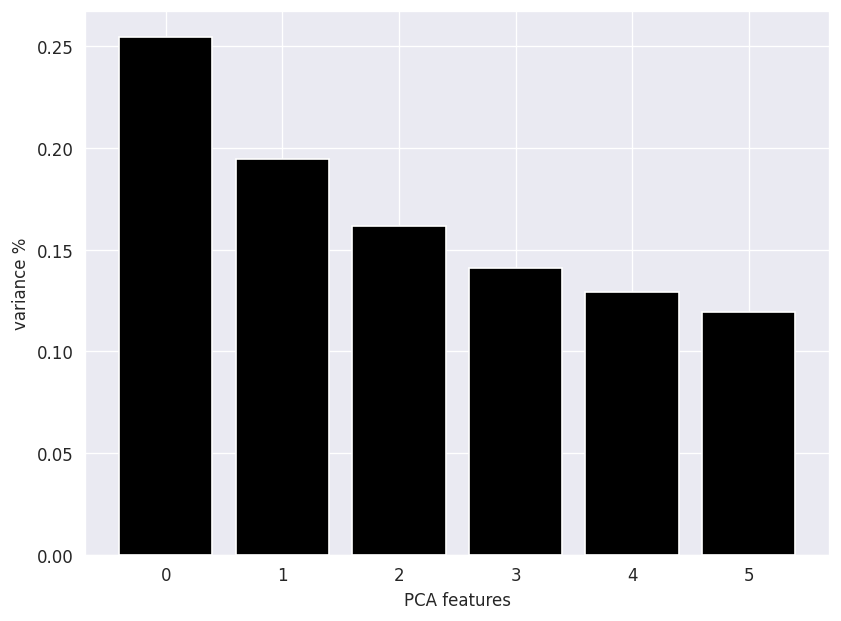

In [ ]:
# Plot the explained variances to verify the variation.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')

In [ ]:
Sum_of_squared_distances = []
K_ss = range(1,10)
for k in K_ss:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

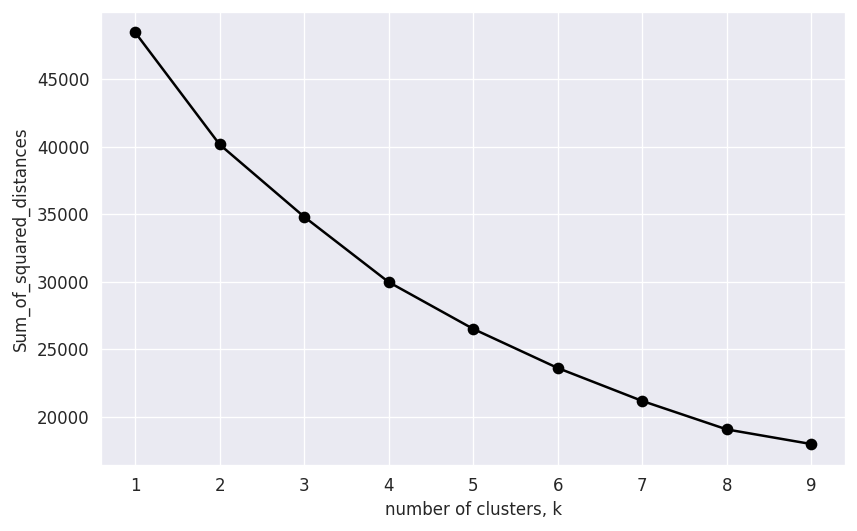

In [ ]:
plt.subplots(figsize = (8, 5))
plt.plot(K_ss, Sum_of_squared_distances, '-o', color='black') 
plt.xlabel('number of clusters, k')
plt.ylabel('Sum_of_squared_distances')
plt.xticks(K_ss)
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=3,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

[[ 0.34459574  0.08819984 -0.04069488  0.00071327 -0.00192474 -0.00117466]
 [-0.07052021 -0.12845612 -0.03197769 -0.00667454  0.00120102  0.00083264]
 [-0.19446493  0.24366309  0.13008938  0.01694905 -0.00105899 -0.00091118]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


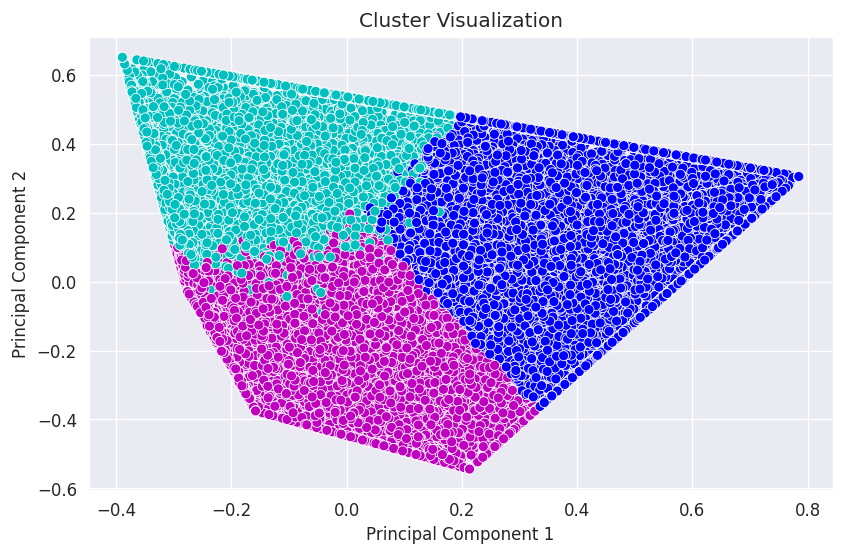

In [ ]:

df_cluster = df_pca.iloc[:,[0, 1]]
df_cluster.columns = ["PCA_1", "PCA_2"]
df_cluster['cluster'] = c_preds
df_cluster.head()


label_color_mapping = {0:'b', 1: 'm', 2: 'c',3:'r' , 4:'g'}
label_color = [label_color_mapping[l] for l in c_preds]

fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = df_cluster, x = "PCA_1", y = "PCA_2", c= label_color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [ ]:
clust_prod = cross_df.copy()
clust_prod['cluster'] = c_preds
clust_prod.head()

order_dow,0,1,2,3,4,5,6,cluster
user_id,,,,,,,,
1,0,11,5,11,22,0,0,1
2,0,45,73,29,0,6,0,2
3,22,16,5,15,0,0,0,0
4,0,0,0,0,9,5,0,1
5,9,12,0,5,0,0,0,2


In [ ]:
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean().sort_values(ascending=False)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean().sort_values(ascending=False)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean().sort_values(ascending=False)

In [ ]:
print(c0.head)
print("*************************************************")
print(c1.head)
print("*************************************************")
print(c2.head)
print("*************************************************")


<bound method NDFrame.head of order_dow
0    50.828538
6    19.138294
1    12.626530
2     7.814337
5     7.422233
3     6.613538
4     6.199009
dtype: float64>
*************************************************
<bound method NDFrame.head of order_dow
5    21.613789
6    19.710344
4    18.959607
2    18.850538
3    18.612149
0    15.781227
1    15.673476
dtype: float64>
*************************************************
<bound method NDFrame.head of order_dow
1    43.904397
2    15.392843
0    10.730850
3    10.601409
4     9.098732
5     8.273646
6     5.385311
dtype: float64>
*************************************************


In [ ]:
from IPython.display import display, HTML
cluster_means = [[c0[1],c0[2],c0[3], c0[4], c0[5], c0[6],c0[0]],
                 [c1[1],c1[2],c1[3], c1[4], c1[5], c1[6],c1[0]],
                 [c2[1],c2[2],c2[3], c2[4], c2[5], c2[6],c2[00]]]
cluster_means = pd.DataFrame(cluster_means, columns = [1,2,3,4,5,6,0])
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,1,2,3,4,5,6,0
0,11.412010,7.062692,5.977395,5.602739,6.708303,17.297420,45.939442
1,12.131067,14.590072,14.405562,14.674490,16.728793,15.255551,12.214465
2,42.465994,14.888540,10.254084,8.800638,8.002583,5.208876,10.379284


In [ ]:
####COMPLETE####